Se utilizará un modelo de clasificación ya que como inputs tenemos datos con variables categóricas, y este modelo trabaja eficientemente con estas.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [30]:
df = pd.read_csv("inputs/dataTransform.csv",header=0, delimiter=';')

/var/folders/jy/x2pqrfp13zq3nj0tq7p5wp400000gn/T/ipykernel_2162/2404280550.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("inputs/dataTransform.csv",header=0, delimiter=';')


Partición del DF

In [31]:
X = df.drop("LoanApproved", axis=1).copy()
y = df.LoanApproved.copy()

In [32]:
X

,ApplicationDate,Gender,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,...,TotalAssets,TotalLiabilities,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,2018-01-01,1,45,39948,617,Employed,Master,22,13152,48,...,146111,19183,0.724972,11,126928,0.199652,0.227590,420.000,0.181077,49
1,2018-01-02,1,38,39709,628,Employed,Associate,15,26045,48,...,53204,9595,0.935132,3,43609,0.207045,0.201077,794.000,0.389852,52
2,2018-01-03,1,47,40724,570,Employed,Bachelor,26,17627,36,...,25176,128874,0.872241,6,5205,0.217627,0.212548,666.000,0.462157,52
3,2018-01-04,1,58,69084,545,Employed,High School,34,37898,96,...,104822,5370,0.896155,5,99452,0.300398,0.300911,1.048,0.313098,54
4,2018-01-05,1,37,103264,594,Employed,Associate,17,9184,36,...,244305,17286,0.941369,5,227019,0.197184,0.175990,3.302,0.070210,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2019-03-20,1,44,30180,587,Employed,High School,19,24521,36,...,80969,25642,0.826217,1,55327,0.216021,0.195574,906.000,0.627741,55
19996,2019-03-21,1,56,49246,567,Employed,Associate,33,25818,36,...,69571,5569,0.816618,3,64002,0.227318,0.199168,958.000,0.334418,54
19997,2019-03-22,1,44,48958,645,Employed,Bachelor,20,37033,72,...,108316,4653,0.887216,3,103663,0.229533,0.226766,945.000,0.357227,45
19998,2019-03-23,1,60,41025,560,Employed,High School,36,14760,72,...,22085,11485,0.843787,5,10600,0.249760,0.264873,4.112,0.408678,59


In [33]:
y

0        0
1        0
2        0
3        0
4        1
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: LoanApproved, Length: 20000, dtype: int64

In [34]:
y.value_counts(normalize=True)*100

LoanApproved
0    76.1
1    23.9
Name: proportion, dtype: float64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

In [36]:
X_train

,ApplicationDate,Gender,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,...,TotalAssets,TotalLiabilities,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
8524,2021-04-07,0,19,50859,538,Employed,Bachelor,0,29668,72,...,4572,41213,0.971468,4,3310,0.275668,0.220534,746.000,0.282990,58
18758,2022-07-09,1,36,70618,605,Employed,High School,17,8858,96,...,52377,29475,0.872611,6,22902,0.241358,0.243689,210.000,0.069913,47
15520,2020-05-06,1,40,30117,616,Employed,High School,20,12622,48,...,77380,21863,0.849145,5,55517,0.199622,0.216549,395.000,0.314497,50
19306,2024-01-08,1,42,43785,556,Employed,Doctorate,22,18041,48,...,32204,18362,0.911877,4,13842,0.235041,0.233809,582.000,0.294625,60
18983,2023-02-19,1,31,31830,596,Employed,High School,12,13725,12,...,34194,17571,0.865123,5,16623,0.180725,0.177613,1.257,0.624599,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16525,2023-02-05,1,22,33577,503,Employed,High School,0,28209,84,...,31618,7704,0.709853,2,23914,0.301709,0.311936,829.000,0.425771,53
16422,2022-10-25,0,21,35506,506,Employed,High School,0,45792,12,...,84136,76525,0.843921,5,7611,0.257792,0.263725,438.000,NaN,55
2230,2024-02-09,1,31,81776,612,Employed,Doctorate,10,14455,108,...,113194,72736,0.869060,7,40458,0.253455,0.242914,3.306,0.094145,38
10125,2018-12-16,0,38,40653,560,Employed,Bachelor,15,17285,120,...,33086,33109,0.866658,5,4215,0.292285,0.337907,5.000,0.243156,58


In [37]:
y_train

8524     0
18758    0
15520    0
19306    0
18983    0
        ..
16525    0
16422    0
2230     1
10125    0
19666    0
Name: LoanApproved, Length: 14000, dtype: int64

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
ohe = OneHotEncoder(sparse_output=False).fit(X_train[["Gender","EmploymentStatus", "EducationLevel", "BankruptcyHistory", "PreviousLoanDefaults"]])
##ohe = OneHotEncoder(sparse_output=False).fit(X_train[["EmploymentStatus","LoanApproved"]])

In [40]:
encoded = ohe.transform(X_train[["Gender","EmploymentStatus", "EducationLevel", "BankruptcyHistory", "PreviousLoanDefaults"]])

In [41]:
encoded_df = pd.DataFrame(columns=ohe.get_feature_names_out(), data=encoded, index=X_train.index)

In [42]:
encoded_df

,Gender_0,Gender_1,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,BankruptcyHistory_0,BankruptcyHistory_1,PreviousLoanDefaults_0,PreviousLoanDefaults_1
8524,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
18758,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
15520,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
19306,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
18983,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16525,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
16422,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2230,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
10125,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [43]:
X_train = pd.concat([X_train, encoded_df], axis='columns')

In [44]:
X_train

,ApplicationDate,Gender,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,...,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,BankruptcyHistory_0,BankruptcyHistory_1,PreviousLoanDefaults_0,PreviousLoanDefaults_1
8524,2021-04-07,0,19,50859,538,Employed,Bachelor,0,29668,72,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
18758,2022-07-09,1,36,70618,605,Employed,High School,17,8858,96,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
15520,2020-05-06,1,40,30117,616,Employed,High School,20,12622,48,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
19306,2024-01-08,1,42,43785,556,Employed,Doctorate,22,18041,48,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
18983,2023-02-19,1,31,31830,596,Employed,High School,12,13725,12,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16525,2023-02-05,1,22,33577,503,Employed,High School,0,28209,84,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
16422,2022-10-25,0,21,35506,506,Employed,High School,0,45792,12,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2230,2024-02-09,1,31,81776,612,Employed,Doctorate,10,14455,108,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
10125,2018-12-16,0,38,40653,560,Employed,Bachelor,15,17285,120,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


TEST

In [45]:
encoded_test = ohe.transform(X_test[["Gender","EmploymentStatus", "EducationLevel", "BankruptcyHistory", "PreviousLoanDefaults"]])
encoded_df_test = pd.DataFrame(columns=ohe.get_feature_names_out(), data=encoded_test, index=X_test.index)

In [46]:
X_test = pd.concat([X_test, encoded_df_test], axis='columns')

In [47]:
X_test

,ApplicationDate,Gender,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,...,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,BankruptcyHistory_0,BankruptcyHistory_1,PreviousLoanDefaults_0,PreviousLoanDefaults_1
17702,2019-08-18,0,55,20211,592,Employed,Bachelor,33,46268,60,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
12509,2018-10-17,1,46,67455,628,Employed,High School,26,66712,36,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
13759,2022-03-20,0,38,21543,531,Employed,Master,16,11676,36,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
10107,2018-11-28,1,38,17357,576,Employed,High School,16,22538,48,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4831,2024-07-15,1,25,17983,598,Self-Employed,Bachelor,3,54160,48,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12094,2024-05-07,0,47,28101,534,Employed,Bachelor,24,34396,24,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4060,2022-06-05,1,48,16353,621,Employed,Associate,20,12181,60,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
699,2019-12-01,0,37,51737,499,Employed,Associate,14,34832,60,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8383,2020-11-17,1,54,166784,574,Employed,High School,27,23342,84,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [73]:
X_train = X_train.drop(["Gender","EmploymentStatus", "EducationLevel", "BankruptcyHistory", "PreviousLoanDefaults"], axis=1)
X_test = X_test.drop(["Gender","EmploymentStatus", "EducationLevel", "BankruptcyHistory", "PreviousLoanDefaults"], axis=1)




KeyError: "['Gender', 'EmploymentStatus', 'EducationLevel', 'BankruptcyHistory', 'PreviousLoanDefaults'] not found in axis"

In [53]:
X_train = X_train.drop(["ApplicationDate","MaritalStatus","HomeOwnershipStatus","MonthlyDebtPayments","LoanPurpose"], axis=1)
X_test = X_test.drop(["ApplicationDate","MaritalStatus","HomeOwnershipStatus","MonthlyDebtPayments","LoanPurpose"], axis=1)

In [ ]:
X_train = X_train.drop(["RiskScore"], axis=1)
X_test = X_test.drop(["RiskScore"], axis=1)

In [54]:
from xgboost import XGBClassifier

In [58]:
from sklearn.metrics import classification_report

In [69]:
xgb = XGBClassifier(n_estimators=200)

In [70]:
%%time
xgb.fit(X_train, y_train)

CPU times: user 349 ms, sys: 161 ms, total: 510 ms
Wall time: 202 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
train_pred = xgb.predict(X_train)
test_pred = xgb.predict(X_test)

In [72]:
print("Entrenamiento")
print(classification_report(y_train, train_pred))
print("----------------------------------------------------------")
print("Testing")
print(classification_report(y_test, test_pred))


Entrenamiento
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10654
           1       1.00      1.00      1.00      3346

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000

----------------------------------------------------------
Testing
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4566
           1       1.00      0.99      1.00      1434

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [74]:
xgb.feature_importances_

array([2.1704182e-03, 1.7613817e-02, 1.7455893e-02, 3.0758439e-03,
       9.8923929e-03, 2.3741890e-02, 1.4017444e-04, 0.0000000e+00,
       3.9456813e-03, 1.7693560e-03, 1.1053530e-03, 5.9611585e-02,
       1.0595118e-03, 1.0639611e-03, 2.5097947e-03, 6.0666155e-04,
       1.6369615e-02, 5.1613934e-03, 3.2655338e-03, 0.0000000e+00,
       1.5498800e-02, 1.7932922e-02, 1.2178336e-02, 8.2854106e-04,
       7.6670438e-02, 6.0218620e-01, 0.0000000e+00, 0.0000000e+00,
       7.4557201e-03, 7.4109137e-03, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.9879553e-02, 0.0000000e+00,
       3.7221700e-02, 0.0000000e+00, 3.2178022e-02, 0.0000000e+00],
      dtype=float32)

In [75]:
fi = pd.DataFrame(columns=["Feauture", "Importance"])
fi["Feauture"] = X_train.columns

In [76]:
fi["Importance"] = xgb.feature_importances_

In [77]:
fi = fi.sort_values("Importance", ascending=True)

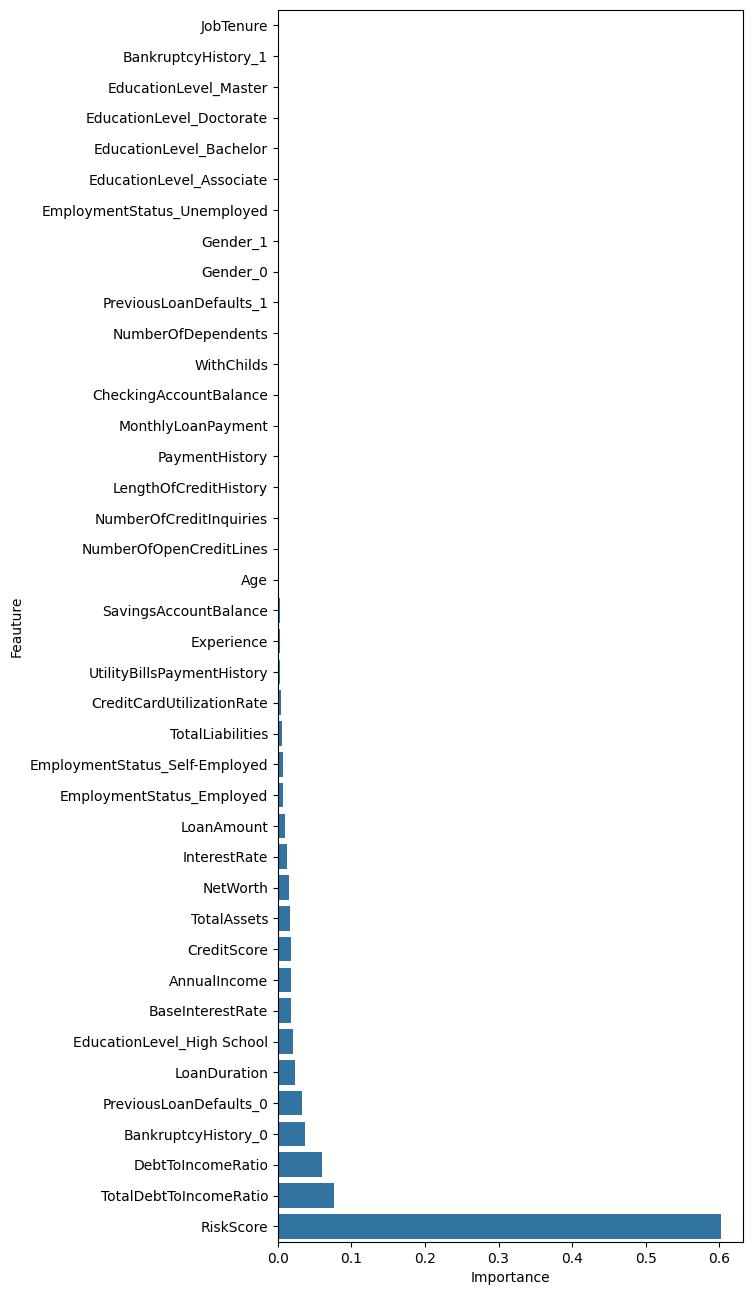

In [78]:
plt.figure(figsize=(6,16))
sns.barplot(y=fi.Feauture, x=fi.Importance)
plt.show()